Nom Prénom : **Cheikh Amine**
 
Promotion : **M2 IWOCS**

# TP 2 - Régression linéaire
*M2 IWOCS, Apprentissage Automatique*

## Exercice 1 - Régression linéaire univarié 
Les données utilisées pour cet exercice décrivent les tailles d'enfants d'âge compris entre 2 et 8 ans : le fichier `ex1x.dat` correspond à leur âge et `ex1y.dat` correspond à leur taille (en mètres). On a dans ces 2 fichiers, les données de 50 enfants rangées dans le même ordre. 

Ces données constituent des exemples d'apprentissage qui vont être utilisées afin de construire un modèle de régression linéaire qui a pour objectif de prédire la taille d'un enfant à partir de son âge.

1. Tout d'abord, nous allons utiliser la fonction `loadtxt`du package `numpy`en Python (ici désigné par `np`). Cette fonction permet de lire les fichiers et de les concertir en vecteurs/matrices :
```
    x=np.loadtxt('ex1x.dat');
    y=np.loadtxt('ex1y.dat');
``` 

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

# Question 1 
x = np.loadtxt('ex1dat/ex1x.dat')
y = np.loadtxt('ex1dat/ex1y.dat')

2. Afficher le nuage de points $(x_i,y_i)$.

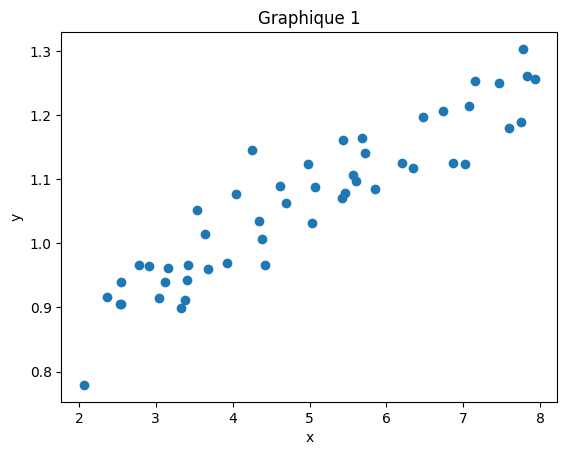

In [15]:
# Question 2
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique 1')
plt.show()

3. Définir en Python, la fonction hypothèse correspondant à un modèle de régression linéaire. Soit le vecteur $\theta = (\theta_0, \theta_1)$, cette fonction hypothèse s'écrit 
$$
h(\theta_0, \theta_1, x) = \theta_0 + \theta_1 x
$$

In [16]:
theta = [0,1]
def h(x,theta):
      return theta[0] + theta[1] * x  

4. Définir en Python, la fonction de coût $J(\theta_0, \theta_1)$ telle que vue en cours.

In [17]:
from numpy import square


m = len(x)
print('Nombre de valeurs m =',m)

def J(theta): 
    result = 0
    # on définit l'écart entre 2 valeurs  et en faire la somme
    for i in range(m): 
        result += (h(x[i],theta)-y[i])**2
    result = (1/(2*m))*result
    
    return result    

Nombre de valeurs m = 50


5. Définir en Python, une fonction qui réalise une itération et qui va renvoyer $\theta_0^*$ et $\theta_1^*$, en fonction de $\theta_0$ et $\theta_1$, selon les formules de descente de gradient vue en cours.  
Pour faire fonctionner cette méthode de gradient, il faut définir la valeur du coefficient d'apprentissage noté $\alpha$ dans le cours ; il régle la profondeur de descente. On propose ici que ce coefficient prenne une valeur constante égale à 0,07. On partira aussi des valeurs initiales $\theta_0=\theta_1=0$.

In [18]:
def gradient_descent(alpha=0.07):
# On commence avec pour valeurs initiales de theta 1 et 0 = 0
    theta = np.array([0.0, 0.0])
    
# On calcule la nouvelle valeur de gradiant     
    somme_ecart_1 = np.sum((h(x, theta) - y))
    somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
    theta_new = np.array([
        theta[0] - alpha * (1/m) * somme_ecart_1,
        theta[1] - alpha * (1/m) * somme_ecart_2
    ])
    
    return theta_new
        
# Utilisation 
theta_optimal = gradient_descent(alpha=0.07)
print("Paramètres optimaux :", theta_optimal)              

Paramètres optimaux : [0.07452802 0.38002167]


6. Faire tourner la méthode de descente de gradient sur quelques itérations puis représenter la droite 
$$
y= \theta_0 + \theta_1 x
$$
sur le nuage de points.

Paramètres optimaux : [0.11560166 0.08242672]


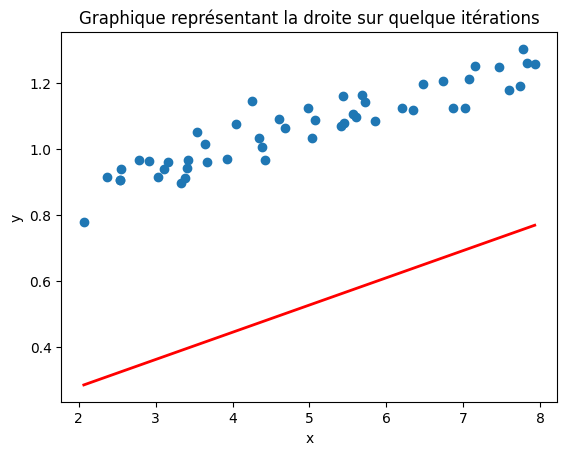

In [19]:
def gradient_descent(num_iterations=20):
    alpha = 0.07 # Coefficient d'apprentissage qui nous permet de régler la profondeur de la descente
# Initialisation
    theta = np.array([0.0, 0.0])
        
    for i in range(num_iterations):  
        somme_ecart_1 = np.sum((h(x, theta) - y))
        somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
        # Mise à jour simultanée des paramètres
        theta_new = np.array([
            theta[0] - alpha * (1/m) * somme_ecart_1,
            theta[1] - alpha * (1/m) * somme_ecart_2
        ])
        
        theta = theta_new
       
    return theta
        
        
# Utilisation 
theta_optimal = gradient_descent()
print("Paramètres optimaux :", theta_optimal) 

y_pred = h(x,theta_optimal)


plt.scatter(x,y)
plt.plot(x,y_pred,color='red',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique représentant la droite sur quelque itérations')
plt.show()
             

7. Faire tourner la méthode de descente de gradient pendant toutes les itérations nécessaires à faire converger la solution $\theta$ recherchée. Pour cela on définit le critère d'arrêt du processus itératif par
$$
\left\vert \dfrac{J(\theta^*)-J(\theta)}{J(\theta)}\right\vert < 10^{-3}
$$
Afficher la droite obtenue suite à cette convergence sur le nuage de points.

Critère d'arrêt vérifié !
Valeur optimal des paramètres :  [0.71385319 0.07048728]


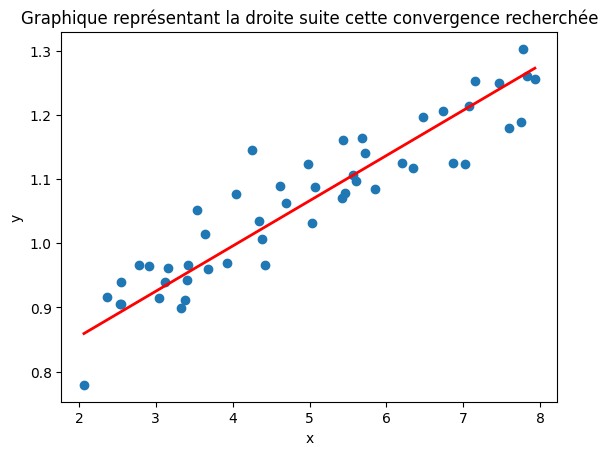

In [20]:
def gradient_descent(num_iterations=1000):
    alpha = 0.07 # Coefficient d'apprentissage qui nous permet de régler la profondeur de la descente
    # Initialisation
    theta = np.array([0.0, 0.0])
        
    for i in range(num_iterations):  
        somme_ecart_1 = np.sum((h(x, theta) - y))
        somme_ecart_2 = np.sum((h(x, theta) - y) * x)
        
        # Mise à jour simultanée des paramètres
        theta_new = np.array([
            theta[0] - alpha * (1/m) * somme_ecart_1,
            theta[1] - alpha * (1/m) * somme_ecart_2
        ])
        
        # Condition pour éviter la division par 0 dès la première itération
        if J(theta) > 0 : 
            # Critère d'arret
            op = (J(theta_new)-J(theta))/J(theta)
            norm_op = abs(op) 
            if norm_op < 10**-3 : 
                print("Critère d'arrêt vérifié !")
                print("Valeur optimal des paramètres : ",theta_new)
                break
            
        theta = theta_new
       
    return theta
        
        
# Utilisation 
theta_optimal = gradient_descent()

y_pred = h(x,theta_optimal)


plt.scatter(x,y)
plt.plot(x,y_pred,color='red',linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphique représentant la droite suite cette convergence recherchée')
plt.show()
             

8. On peut désormais utiliser le modèle pour faire des prédictions : quelle est la taille de 3 enfants d'âges respectifs 3, 5 et 7 ans ?

Réponse : 

On peut maintenant à partir de ce modèle prédire la taille de 3 enfants de 3,5 et 7 ans : 

D'après la lecture du graphique on un enfant : 
- de 3 ans mesure environ 86 cm
- de 5 ans mesure environ 105 cm 
- de 7 ans mesure environ 120 cm 

9. Nous allons maintenant visualiser la fonction de coût $J(\theta)$ en 3D sur une grille de base 100 x 100 et des valeurs pour $\theta$ dans les intervalles suivants (il faudra donc prendre 100 valeurs réparties dans ces intervalles) : $\theta_0 \in [-30;30]$ et $\theta_1 \in [-3;3]$.  

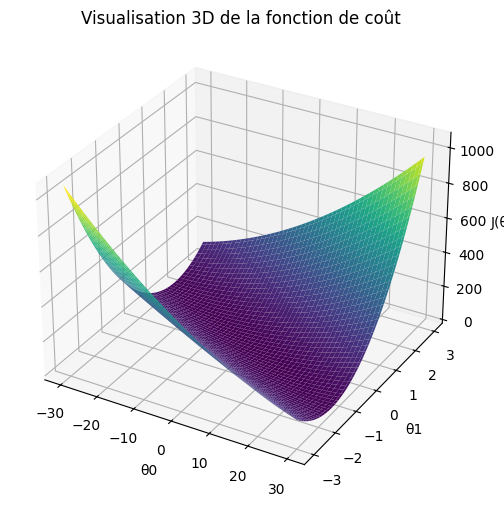

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 

# On crée une liste de valeurs répartie sur l'intervalle [-30,30] de theta0
theta_0_values = np.linspace(-30,30,100)
# On créer une liste de valeurs répartie sur l'intervalle [-3,3] de theta1
theta_1_values = np.linspace(-3,3,100)

#  On initialise la matrice qui va contenir toute les valeurs possible de la fonction coût en fonction de (theta0,theta1) 
Jvalues = np.zeros((len(theta_0_values),len(theta_1_values)))

# On calcule toutes les valeurs sur les 10 000 paires de valeurs (theta0,theta1)
for i, t0 in enumerate(theta_0_values):
    for j, t1 in enumerate(theta_1_values): 
        Jvalues[i][j] = J(np.array([theta_0_values[i],theta_1_values[j]]))
        


# Affichage 3D

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

T0, T1 = np.meshgrid(theta_0_values, theta_1_values)

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(T0,T1,Jvalues,cmap='viridis')

ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J(θ)')
plt.title("Visualisation 3D de la fonction de coût")
plt.show()
    

## Exercice 2 - Régression linéaire multivariée et écriture matriciellle de la méthode de descente du gradient

Dans ce problème, on utilise des données correspondant à 47 exemples d'apprentissage sur des données immobilières à Portland, Oregon (USA). Les données d'entrée $x$ (stockées dans le ficheir `ex2x.dat`) correspondent aux surfaces et au nombre de pièces de ces 47 appartements et la donnée cible $y$ (stockée dans le fichier `ex2y.dat`) correspond au prix de ces mêmes appartements.

1. Utiliser la fonction `loadtxt`du package `numpy`en Python (ici désigné par `np`). Cette fonction permet de lire les fichiers et de les concertir en vecteurs/matrices :
```
    x=np.loadtxt('ex2x.dat');
    y=np.loadtxt('ex2y.dat');
``` 

In [22]:
import numpy as np 

x = np.loadtxt('ex2dat/ex2x.dat')
y = np.loadtxt('ex2dat/ex2y.dat')

# On affiche les 5 premières valeurs pour vérifié 
print("x : \n",x[:5]) 
print("y : \n",y[:5]) 

x : 
 [[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
y : 
 [399900. 329900. 369000. 232000. 539900.]


2. Prétraitement des données : utiliser la fonction `sklearn.preprocessing.StandardScaler` pour normaliser les données.

In [23]:
import sklearn as sk

scaler = sk.preprocessing.StandardScaler()

dataX_norm = scaler.fit_transform(x)

print("Données normaliser :",dataX_norm[:5])

Données normaliser : [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


3. Définir les fonctions en Python sous forme matricielle pour représenter la fonction hypothèse $h_\theta (X)$, le vecteur tel que défini dans le cours :$E = h_\theta (X) - Y$, la fonction décrivant une itération et la fonction de coût $J(\theta)$.

In [24]:

# On construit la matrice X augmentée et le vecteur Y 
X = np.c_[np.ones(dataX_norm.shape[0]), dataX_norm]
Y = y 

print("\n Matrice X : \n",X[:5])
print("\n Vecteur Y : \n",Y[:5])

# Fonction hypothèse
def h(theta,X):
     return X @ theta


theta_test1 = np.array([1.0, 2.0, -0.5])  # [θ0, θ1, θ2]
test = h(theta_test1,X)
print("\nTest fonction d'hyothèse : \n",test)   


# Calcule de E = h(X)-Y défini dans le cours
def E(theta,X,Y): 
    return h(theta,X) - Y

# Test
theta = np.array([1.0, 2.0, -0.5])
err = E(theta, X, Y)
print("\nTest fonction E :\n")
print(err[:5])

# Définition de la fonction coût : 

def J(theta,X,Y):
    # Variable du resultat de la fonction cout  
    res = None
    m = X.shape[0]
    # Somme critère des moindre carré 
    somme_crit = np.sum(E(theta,X,Y)**2)
    
    res = (1.0/(2*m))*(somme_crit)
    return res

result_test = J(theta_test1,X,Y)
print("\nTest fonction coût :\n",result_test)

# Fonction décrivant une itération

def iteration(theta, X, Y, alpha=0.07):
    theta = np.asarray(theta, dtype=float)
    m = X.shape[0] # nombre de ligne 
    e = E(theta, X, Y)                      
    assert e.shape[0] == m
    grad = (1.0 / m) * (X.T @ e)            
    theta_next = theta - alpha * grad
    return theta_next

# Exemple d'utilisation
theta_init = np.zeros(X.shape[1]) # X.shape[1] = nombre de colonne
alpha = 0.07

theta_next = iteration(theta_init, X, Y, alpha)
print("Nouvelle valeur de theta après une itération :", theta_next)
    



 Matrice X : 
 [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]

 Vecteur Y : 
 [399900. 329900. 369000. 232000. 539900.]

Test fonction d'hyothèse : 
 [ 1.37587753  0.09376529  2.12886408  0.28984183  2.99103891  0.40900732
 -0.07413036 -0.34632483 -0.46588688 -0.1758853   0.29453301  1.11131468
  0.8314886   6.08673466 -0.75080071  1.21032746  0.04562998 -0.83220466
  1.99638437  3.06989899  0.51859216  1.49055012  0.10394078  0.35049822
  5.91923558 -1.17817146 -0.26746475  2.44939214  1.62008938  2.7317621
  1.36590032 -0.10426027  0.54892036  4.00369884 -0.03362667 -0.32088609
 -0.82457304  0.78295672  6.0818452   0.85927292  0.92072246  1.71675658
  1.88954169 -0.92378411 -1.14490282  0.07067214 -0.91615249]

Test fonction E :

[-399898.62412247 -329899.90623471 -368997.87113592 -231999.71015817
 -539897.00896109]

Test fonction coût 

4. Pour la valeur du taux d'apprentissage $\alpha=0,07$, effectuer le calcul de régression permettant d'obtenir le vecteur $\theta = (\theta_0, \theta_1, \theta_2)$ optimal permettant de calculer la meilleure régression linéaire multivariée sur le jeu de données d'apprentissage.

In [25]:
def gradient(X,Y, alpha = 0.07, nb_iterations_max = 2500, e = 1e-6): 
    # Initialisation 
    theta = np.zeros(X.shape[1])
        
    for i in range(nb_iterations_max): 
        theta_old = theta.copy()    # on copie la valeur de theta 
        
        theta = iteration(theta,X,Y,alpha) # calcule de la nouvelle valeur optimal du vecteur theta
        
        # Afficher le progrès
        if i % 100 == 0:  
            print(f"Itération {i:4d}: Theta = {theta}")
            
        # Critère d'arrets (différence relative)
        if i > 0: # condition pour eviter les division par zéro à la première itération 
           
           # Calcule |θ^(n+1) - θ^(n)| 
           diff_theta = np.linalg.norm(theta-theta_old)
           
           #Calcule de theta |θ^(n)|
           norm_theta_old = np.linalg.norm(theta_old)
            
            # Éviter la division par zéro  
           if norm_theta_old > 1e-10: 
            # Calcule du critère d'arrêt 
              diff_rel = diff_theta / norm_theta_old
              
              # Vérifier le critère d'arrêt
              if diff_rel < e :
                  print(f"Critère d'arrêt déclencher ! Fin de la boucle") 
                  break
            
    else : 
        print("Nombre d'itération maximum atteint ! ")
                   
    print(f"Theta optimal :{theta}")
    
    return theta      
            
# Utilisation 
theta_optimal = gradient(X,Y,alpha = 0.07, e=1e-6)            

Itération    0: Theta = [23828.88617021  7403.4893445   3829.61752291]
Itération  100: Theta = [340189.41366678 106985.99621642  -4117.42596665]
Itération  200: Theta = [340412.50214778 109340.04737273  -6470.60576553]
Critère d'arrêt déclencher ! Fin de la boucle
Theta optimal :[340412.65921994 109440.01514972  -6570.57353424]


5. Nous allons maintenant automatiser la recherche du meilleur taux d'apprentissage $\alpha \in [0,001 ; 10]$. Pour ce faire, on devra calculer pour chaque itération la valeur de la fonction de coût $J(\theta)$ et on stockera toutes ces valeurs dans un vecteur. Comme on veut sélectionner un taux d'apprentissage efficace, on va comparer les résultats de calcul de $J(\theta)$ sur 50 itérations en changenat de taux d'apprentissage à chaque série d'itérations. Les valeurs de ce taux doivent rester dans l'intervalle initialement donné $\alpha \in [0,001 ; 10]$. On tracera alors les courbes représentant en abscisse, le nombre d'itérations et en ordonnées les valeurs de la fonction de coût ; chaque courbe correspond à une valeur du taux d'apprentissage. A partir de ces courbes, sélectionner ce qui parît être le meilleur taux d'apprentissage et recalculer le vecteur $\theta$ jusqu'à la convergence. Utiliser ce vecteur $\theta$ pour prédire le prix d'un logement de 1650 m2 et de 3 pièces. 

alpha : [np.float64(0.0), np.float64(0.2), np.float64(0.4), np.float64(0.6), np.float64(0.8), np.float64(1.0), np.float64(1.2), np.float64(1.4), np.float64(1.6), np.float64(1.8), np.float64(2.0), np.float64(2.2), np.float64(2.4), np.float64(2.6), np.float64(2.8), np.float64(3.0), np.float64(3.2), np.float64(3.4), np.float64(3.6), np.float64(3.8), np.float64(4.0), np.float64(4.2), np.float64(4.4), np.float64(4.6), np.float64(4.8), np.float64(5.0), np.float64(5.2), np.float64(5.4), np.float64(5.6), np.float64(5.8), np.float64(6.0), np.float64(6.2), np.float64(6.4), np.float64(6.6), np.float64(6.8), np.float64(7.0), np.float64(7.2), np.float64(7.4), np.float64(7.6), np.float64(7.8), np.float64(8.0), np.float64(8.2), np.float64(8.4), np.float64(8.6), np.float64(8.8), np.float64(9.0), np.float64(9.2), np.float64(9.4), np.float64(9.6), np.float64(9.8), np.float64(10.0)]
Intervalle optimal de alpha : [(np.float64(0.8), [np.float64(5236466657.2424), np.float64(2412664958.7422724), np.float64(2

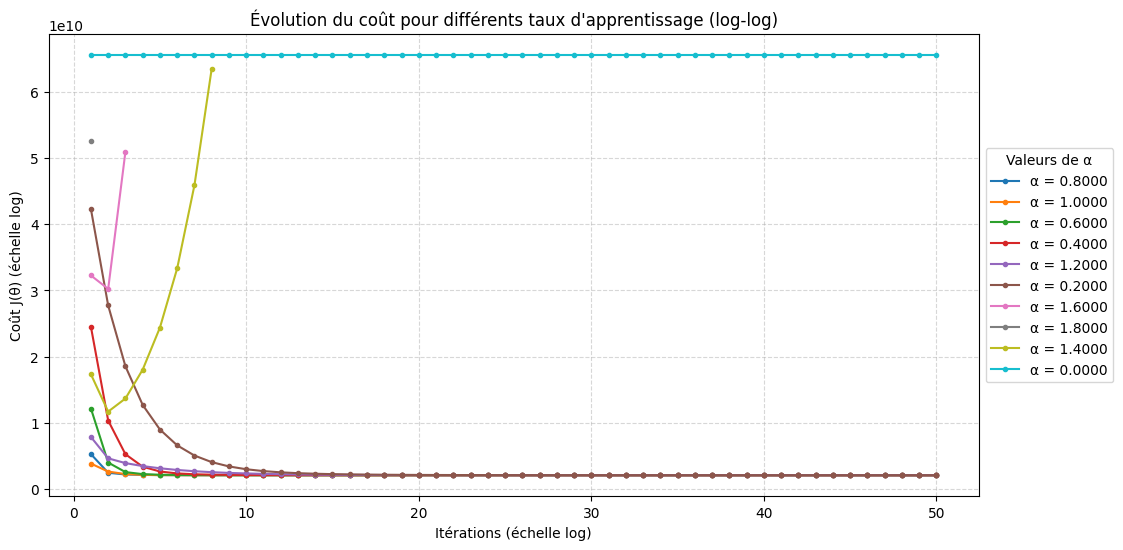

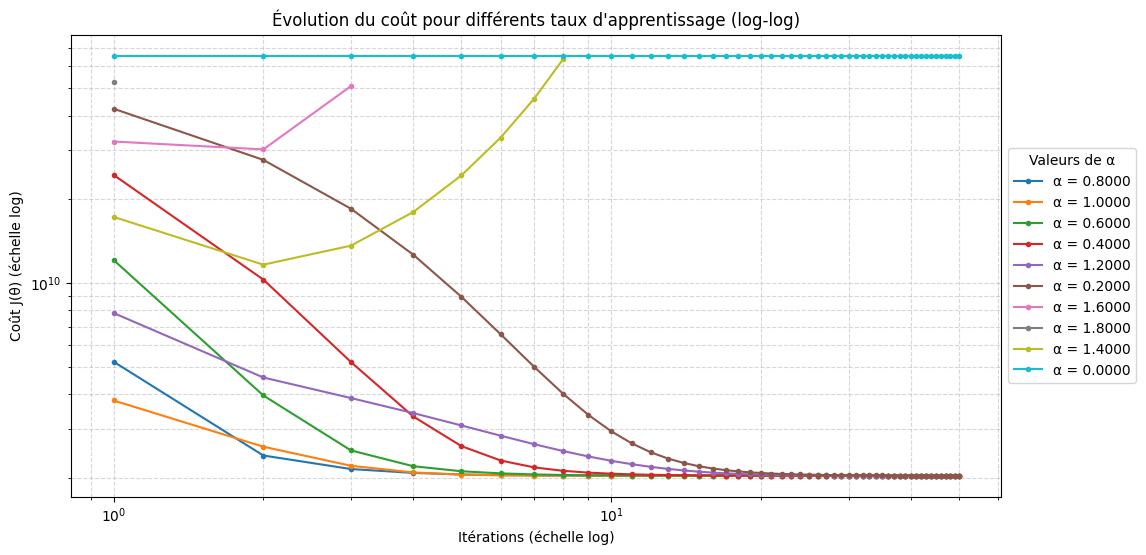


Convergence avec α = 0.800000
Itération    0: Theta = [272330.12765957  84611.30679425  43767.0574047 ]
Critère d'arrêt déclencher ! Fin de la boucle
Theta optimal :[340412.65957447 109447.48947295  -6578.04785747]

Prédiction pour un logement de 1650 m² et 3 pièces :
Prix prédit : 293081.53 $

Paramètres finaux du modèle :
θ₀ (constante) = 340412.659574
θ₁ (surface) = 109447.489473
θ₂ (pièces) = -6578.047857


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Test des différents alpha
#alphas = [0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 0.9, 1.0, 1.2, 1.29, 1.3,2,3,4,5,6,7,8,9,10] 

#alphas = [round(a, 1) for a in np.arange(0, 10.1, 0.20)]
alphas = [
    0.0, 0.2, 0.4, 0.6, 0.8, 
    1.0, 1.2, 1.4, 1.6, 1.8, 
    2.0, 2.2, 2.4, 2.6, 2.8, 
    3.0, 3.2, 3.4, 3.6, 3.8, 
    4.0, 4.2, 4.4, 4.6, 4.8, 
    5.0, 5.2, 5.4, 5.6, 5.8, 
    6.0, 6.2, 6.4, 6.6, 6.8, 
    7.0, 7.2, 7.4, 7.6, 7.8, 
    8.0, 8.2, 8.4, 8.6, 8.8, 
    9.0, 9.2, 9.4, 9.6, 9.8, 
    10.0
]

alphas = [round(a, 1) for a in np.arange(0, 10.1, 0.20)]



print("alpha :",alphas)


historique_couts = {} # Dictionnaire d'historique des couts pour chque valeurs de alpha

for alpha in alphas:
    theta = np.zeros(X.shape[1])
    cout_prev = J(theta,X,Y)
    couts = []
    
    # 50 itérations pour chaque alpha
    for i in range(50):
        theta = iteration(theta, X, Y, alpha)
        cout = J(theta, X, Y)
        # 1) s divergence
        if cout > cout_prev : 
           break
    
        couts.append(cout)
    historique_couts[alpha] = couts

# 2. Sélection du meilleur alpha
alpha_valides = []
for alpha, couts in historique_couts.items():
    if len(couts) > 0 and np.isfinite(couts[-1]):
        alpha_valides.append((alpha, couts))

# Trier par coût final (plus petit = meilleur)
alpha_valides_tries = sorted(alpha_valides, key=lambda x: x[1][-1]) # x = (alpha, couts)
print("Intervalle optimal de alpha :",alpha_valides_tries)
meilleur_alpha = alpha_valides_tries[0][0]

print(f"\nMeilleur alpha trouvé : {meilleur_alpha:.6f}")

#  Affichage des résultats
print("\nTop 5 des alpha :")
for i, (alpha, couts) in enumerate(alpha_valides_tries):
    print(f"{i+1}. α = {alpha:.4f} - Coût final = {couts[-1]:.6f}")

#  Graphique des courbes pour voir les convergence
plt.figure(figsize=(12, 6))

for alpha, couts in alpha_valides_tries[:10]:
    iterations = range(1, len(couts) + 1)  # commence à 1 pour éviter log(0)
    plt.plot(iterations, couts, marker='o', markersize=3, label=f'α = {alpha:.4f}')


plt.xlabel('Itérations (échelle log)')
plt.ylabel('Coût J(θ) (échelle log)')
plt.title('Évolution du coût pour différents taux d\'apprentissage (log-log)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Valeurs de α")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()



#  Graphique des courbes pour voir les convergence
plt.figure(figsize=(12, 6))

for alpha, couts in alpha_valides_tries:
    iterations = range(1, len(couts) + 1)  # commence à 1 pour éviter log(0)
    plt.plot(iterations, couts, marker='o', markersize=3, label=f'α = {alpha:.4f}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Itérations (échelle log)')
plt.ylabel('Coût J(θ) (échelle log)')
plt.title('Évolution du coût pour différents taux d\'apprentissage (log-log)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Valeurs de α")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()




#  Convergence finale avec le meilleur alpha
print(f"\nConvergence avec α = {meilleur_alpha:.6f}")
theta_final = gradient(X, Y, alpha=meilleur_alpha, nb_iterations_max=1000, e=1e-6)

#  Prédiction
print(f"\nPrédiction pour un logement de 1650 m² et 3 pièces :")

# Préparer les nouvelles données (même normalisation)
nouvelle_maison = np.array([[1650.0, 3.0]])
nouvelle_maison_norm = scaler.transform(nouvelle_maison)  # Même normalisation
nouvelle_maison_aug = np.c_[np.ones((1, 1)), nouvelle_maison_norm]

# Prédire le prix
prix_pred = h(theta_final, nouvelle_maison_aug)[0]
print(f"Prix prédit : {prix_pred:.2f} $")

print(f"\nParamètres finaux du modèle :")
print(f"θ₀ (constante) = {theta_final[0]:.6f}")
print(f"θ₁ (surface) = {theta_final[1]:.6f}")
print(f"θ₂ (pièces) = {theta_final[2]:.6f}")